In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [5]:
df = pd.read_csv('Atrazine.csv')
# df = df[df['location'] == 'Chai']
df.drop(['id', 'measure', 'location'], axis=1, inplace=True)

,value,sample date
0,0.0,1998-01-11
1,0.0,1998-01-26
2,0.0,1998-01-26
3,0.0,1998-01-26
4,0.0,1998-01-31


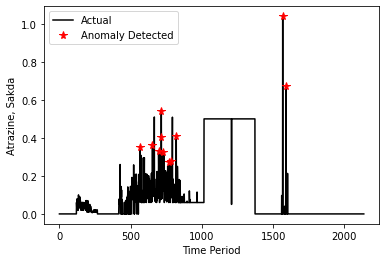

In [14]:
clustering1 = DBSCAN(eps=0.01, min_samples=6).fit(np.array(df['value']).reshape(-1,1))
labels=clustering1.labels_
outlier_pos = np.where(labels == -1)[0]

x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(df['value'])[pos])
    y.append(df['value'].index[pos])
    
plt.plot(df['value'].loc[df['value'].index], 'k-')
plt.plot(y,x,'r*', markersize=8)  
plt.legend(['Actual', 'Anomaly Detected'])
plt.xlabel('Time Period')
#plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 385],[df['value'].index[0],df['value'].index[50],df['value'].index[100],df['value'].index[150],df['value'].index[200], df['value'].index[250], df['value'].index[300],df['value'].index[350], df['value'].index[385]] ,rotation=45)
plt.ylabel('Atrazine, Sakda')

df.head()

In [7]:
from sklearn import metrics

In [22]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
score = metrics.silhouette_score(np.array(df['value']).reshape(-1,1), labels, metric="euclidean", sample_size=len(np.array(df['value']).reshape(-1,1)))

In [24]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhoutte score: %0.3f" % score)

Estimated number of clusters: 6
Estimated number of noise points: 11
Silhoutte score: 0.795
